<a href="https://colab.research.google.com/github/Biingbong/Final-Project-Data-Mining/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laptops

###### Joshua Basile Mhar Layaoen Austria | BSCS 2B

In this Exploratory Data Analysis (EDA), we delve into the laptop market to uncover valuable insights. We aim to answer key questions such as identifying manufacturers with the heaviest and lightest laptops, understanding average prices by brand, exploring operating system preferences, determining which manufacturers offer high-graded CPUs and GPUs, and categorizing laptops into low-end, mid-range, and high-end segments. These insights benefit consumers and manufacturers alike, aiding informed purchasing decisions and refining product strategies in a highly competitive market.

##Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.internals.concat import NullArrayProxy
# google resource initialization
url = 'https://raw.githubusercontent.com/37Degrees/DataSets/master/laptops.csv'
dataset = pd.read_csv(url, encoding = 'unicode_escape')
url = '/content/drive/MyDrive/Colab Notebooks/cpu and gpu/gpu_data (4).csv'
dataset_gpu = pd.read_csv(url, encoding = 'unicode_escape')
url = '/content/drive/MyDrive/Colab Notebooks/cpu and gpu/cpu_data (1).csv'
dataset_cpu = pd.read_csv(url, encoding = 'unicode_escape')

dataset.insert(loc=6, column='Number of Cores', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=7, column='CPU Point', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=8, column='GHZ', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=9, column='GHZ Point', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=10, column='Core Point', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=14, column='FPS', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=15, column='FPS Point', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=16, column='Watt Usage', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=17, column='Watt Usage Point', value=['' for i in range(dataset.shape[0])])
dataset.insert(loc=18, column='GPU Point', value=['' for i in range(dataset.shape[0])])

dataset['GHZ'] = dataset["CPU"].str.split().str[-1]
dataset['GHZ'] = dataset['GHZ'].str.replace('GHz', '')
dataset['GHZ'] = pd.to_numeric(dataset['GHZ'])
dataset['Weight'] = dataset['Weight'].str.replace('kg', '').str.replace("s", "")
dataset['Weight'] = pd.to_numeric(dataset['Weight'])
dataset['Operating System'] = dataset['Operating System'].str.replace('macOS', 'Mac OS')
dataset['Price (Euros)'] = dataset['Price (Euros)'].str.replace(',','.')
dataset['Price (Euros)'] = pd.to_numeric(dataset['Price (Euros)'])
dataset.drop(['Model Name', 'Category', 'Screen Size', ' Storage' , 'RAM', 'Screen', 'Operating System Version'], axis=1, inplace=True)
dataset.head()

,Manufacturer,CPU,Number of Cores,CPU Point,GHZ,GHZ Point,Core Point,GPU,FPS,FPS Point,Watt Usage,Watt Usage Point,GPU Point,Operating System,Weight,Price (Euros)
0,Apple,Intel Core i5 2.3GHz,,,2.3,,,Intel Iris Plus Graphics 640,,,,,,Mac OS,1.37,1339.69
1,Apple,Intel Core i5 1.8GHz,,,1.8,,,Intel HD Graphics 6000,,,,,,Mac OS,1.34,898.94
2,HP,Intel Core i5 7200U 2.5GHz,,,2.5,,,Intel HD Graphics 620,,,,,,No OS,1.86,575.00
3,Apple,Intel Core i7 2.7GHz,,,2.7,,,AMD Radeon Pro 455,,,,,,Mac OS,1.83,2537.45
4,Apple,Intel Core i5 3.1GHz,,,3.1,,,Intel Iris Plus Graphics 650,,,,,,Mac OS,1.37,1803.60


The dataset consists of information about laptops, including their model names, categories, screen sizes, storage capacities, RAM sizes, screen details, operating system versions, manufacturers, CPU models, number of cores, clock speeds, GPU models, gaming performance, power consumption, operating systems, weight, and prices in Euros. These columns provide valuable insights into the specifications, performance, operating systems, and pricing of laptops, enabling analysis and comparisons across different manufacturers and categories within the laptop market.


###1. What manufacturers have the heaviest and lightest laptop? What are average weight of laptops per manufacturer?

The heaviest is 
    Manufacturer  Weight
238         Asus     4.7 
while the lightest are 
     Manufacturer  Weight
50         Lenovo    0.69
1082       Lenovo    0.69
1114       Lenovo    0.69
1126       Lenovo    0.69




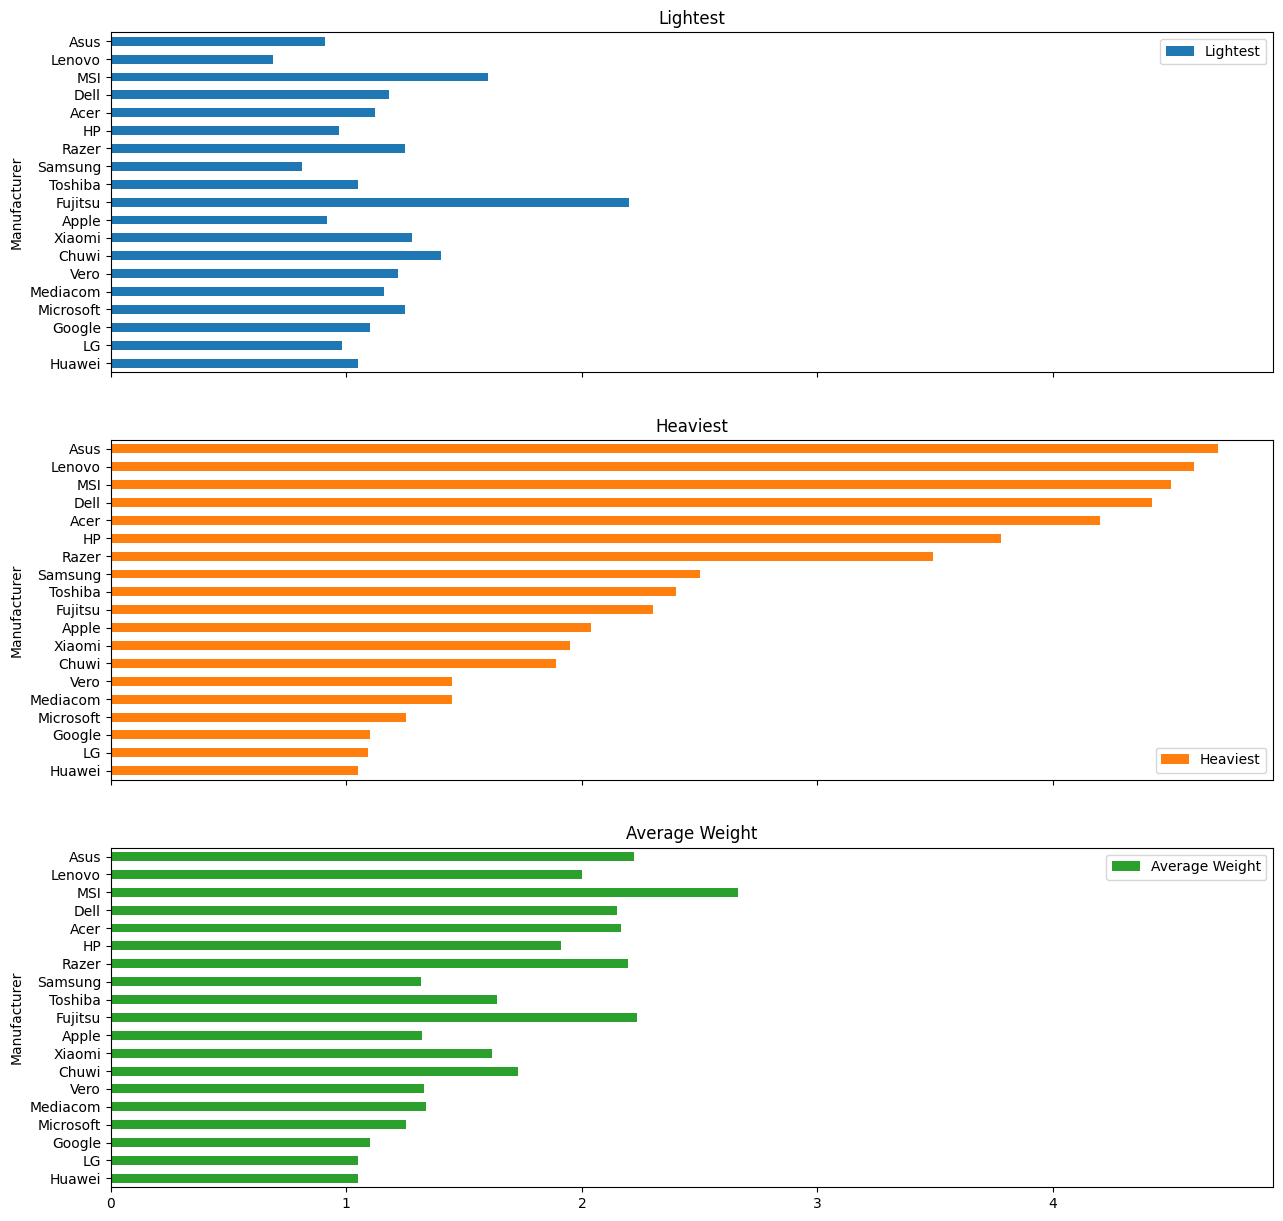

In [ ]:
frame = pd.DataFrame({"Lightest":dataset['Weight'].groupby(dataset['Manufacturer']).min(), "Heaviest": dataset['Weight'].groupby(dataset['Manufacturer']).max(), "Average Weight":dataset['Weight'].groupby(dataset['Manufacturer']).mean()})
frame.sort_values("Heaviest").plot.barh(subplots=True, figsize=(15,15))
print(f"The heaviest is \n{dataset[['Manufacturer', 'Weight']][dataset['Weight'] == dataset['Weight'].max()]} \nwhile the lightest are \n{dataset[['Manufacturer', 'Weight']][dataset['Weight'] == dataset['Weight'].min()]}\n\n")

The visualization shows that among the manufacturers, ASUS has the heaviest laptop while the Lenovo have the lightest laptops. Also, MSI has the heaviest average weight while LG and Huawei have the lightest average weight of laptop

###2. What is the average price of laptops of each manufacturer and which Manufacturer sells the most expensive laptop?

Manufacturer
Vero          15620.80
Mediacom      23371.12
Chuwi         26975.92
Fujitsu       48003.92
Xiaomi        84109.00
Huawei        90059.92
Samsung      111087.92
Google       132115.92
LG           138123.92
Microsoft    155547.12
Acer         156147.92
MSI          168163.92
Toshiba      168163.92
Apple        171708.64
Dell         219856.75
Asus         238818.00
HP           263691.12
Lenovo       294331.92
Razer        366427.92
Name: Price (Euros), dtype: float64

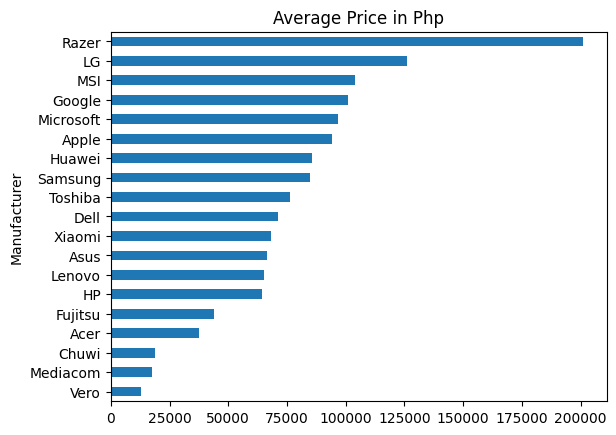

In [ ]:
(dataset['Price (Euros)'].groupby(dataset['Manufacturer']).mean()*60.08).round(2).sort_values(ascending=True).plot.barh(title = 'Average Price in Php')
(dataset['Price (Euros)'].groupby(dataset['Manufacturer']).max()*60.08).round(2).sort_values()

The Visualization shows that average price of all laptops of each manufaturer and that the manufacturer that has highest average price is Razor.

###3. What operating system is most likely to be used by each manufacturer?

Manufacturer  Operating System
Acer          Windows              76
              Linux                16
              Chrome OS            11
Apple         Mac OS               21
Asus          Windows             141
              Linux                10
              No OS                 4
              Chrome OS             3
Chuwi         Windows               3
Dell          Windows             260
              Linux                36
              Chrome OS             1
Fujitsu       Windows               3
Google        Chrome OS             3
HP            Windows             258
              No OS                12
              Chrome OS             4
Huawei        Windows               2
LG            Windows               3
Lenovo        Windows             245
              No OS                47
              Chrome OS             3
              Android               2
MSI           Windows              54
Mediacom      Windows               7
Microsoft     Windo

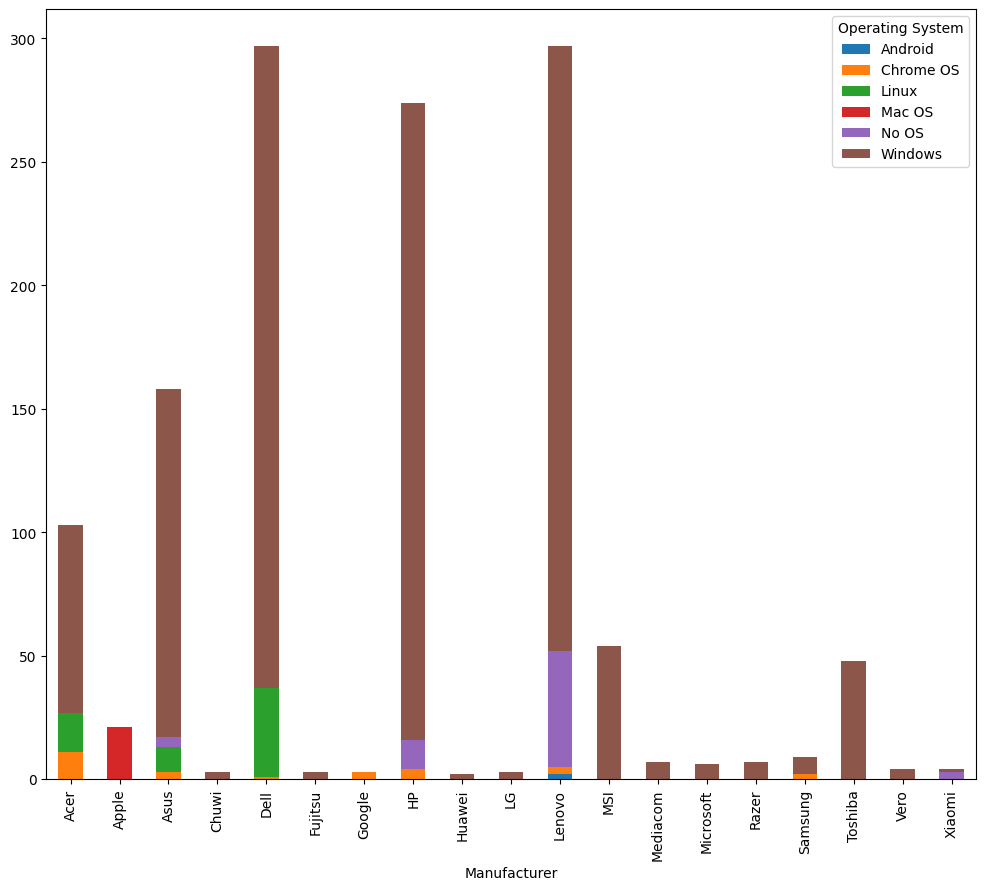

In [ ]:
dataset['Operating System'].groupby(dataset['Manufacturer']).value_counts().unstack().plot.bar(stacked=True, figsize=(12,10))
dataset['Operating System'].groupby(dataset['Manufacturer']).value_counts()

The visualization shows that the Operating System, Windows, are more supperior than the other OS. It also shows that the Apple and Google manufacturer have their own OS. And Xiaomi manufacturer most-likely does not use OS.

###4.Which manufacturers offer laptops with the highest CPU Point and GPU Point averages? Which manufacturer sells the laptop with highest-graded CPU and highest-graded GPU?

In [ ]:
list_cores = []
for i in dataset['CPU']:
  list_cores.append(dataset_cpu['Number of Cores'][dataset_cpu.Processor == i].values)
dataset['Number of Cores'] = list_cores
dataset['Number of Cores'] = dataset['Number of Cores'].astype(str).str.replace('[','').str.replace(']','')
dataset['Number of Cores'] = pd.to_numeric(dataset['Number of Cores'])
dataset['Core Point'][dataset['Number of Cores'] == 2] = 1
dataset['Core Point'][dataset['Number of Cores'] == 4] = 2
dataset['Core Point'][dataset['Number of Cores'] == 6] = 3
dataset['Core Point'][dataset['Number of Cores'] == 8] = 4

list_fps = []
for i in dataset['GPU']:
  list_fps.append(dataset_gpu['FPS'][dataset_gpu.GPU == i].values.tolist())
dataset['FPS'] = list_fps
dataset['FPS'] = dataset['FPS'].astype(str).str.replace('[','').str.replace(']','')
dataset['FPS'] = pd.to_numeric(dataset['FPS'])

list_watt = []
dataset_gpu['Watt Usage'] = dataset_gpu['Watt Usage'].str.replace('W','')
dataset_gpu['Watt Usage'] = pd.to_numeric(dataset_gpu['Watt Usage'])
for i in dataset['GPU']:
  list_watt.append(dataset_gpu['Watt Usage'][dataset_gpu.GPU == i].values)
dataset['Watt Usage'] = list_watt
dataset['Watt Usage'] = dataset['Watt Usage'].astype(str).str.replace('[','').str.replace(']','')
dataset['Watt Usage'] = pd.to_numeric(dataset['Watt Usage'])

ghz = list(set(dataset['GHZ']))
watt = list(set(dataset['Watt Usage']))
fps = list(set(dataset['FPS']))

q1 = np.percentile(ghz, 25)
q2 = np.percentile(ghz, 50)
q3 = np.percentile(ghz, 75)
dataset['GHZ Point'][dataset['GHZ'] <= q1] = 1
dataset['GHZ Point'][(dataset['GHZ'] > q1) & (dataset['GHZ'] <= q2)] = 2
dataset['GHZ Point'][(dataset['GHZ'] > q2) & (dataset['GHZ'] <= q3)] = 3
dataset['GHZ Point'][dataset['GHZ'] > q3] = 4

q1 = np.percentile(watt, 25)
q2 = np.percentile(watt, 50)
q3 = np.percentile(watt, 75)
dataset['Watt Usage Point'][dataset['Watt Usage'] <= q1] = 1
dataset['Watt Usage Point'][(dataset['Watt Usage'] > q1) & (dataset['Watt Usage'] <= q2)] = 2
dataset['Watt Usage Point'][(dataset['Watt Usage'] > q2) & (dataset['Watt Usage'] <= q3)] = 3
dataset['Watt Usage Point'][dataset['Watt Usage'] > q3] = 4

q1 = np.percentile(fps, 25)
q2 = np.percentile(fps, 50)
q3 = np.percentile(fps, 75)
dataset['FPS Point'][dataset['FPS'] <= q1] = 1
dataset['FPS Point'][(dataset['FPS'] > q1) & (dataset['FPS'] <= q2)] = 2
dataset['FPS Point'][(dataset['FPS'] > q2) & (dataset['FPS'] <= q3)] = 3
dataset['FPS Point'][dataset['FPS'] > q3] = 4

dataset['CPU Point'] = dataset['GHZ Point'] + dataset['Core Point']
dataset['GPU Point'] = dataset['FPS Point'] + dataset['Watt Usage Point']

<ipython-input-6-2f7991fe6321>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Number of Cores'] = dataset['Number of Cores'].astype(str).str.replace('[','').str.replace(']','')
<ipython-input-6-2f7991fe6321>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Core Point'][dataset['Number of Cores'] == 2] = 1
<ipython-input-6-2f7991fe6321>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Core Point'][dataset['Number of Cores'] == 4] = 2
<i

CPU Point  Manufacturer
2          Asus             21
           HP               11
           Lenovo           11
           Acer              7
           Apple             6
           Dell              6
           Google            3
           Vero              2
           Mediacom          1
3          Lenovo           42
           HP               31
           Acer             30
           Dell             30
           Asus             16
           Mediacom          5
           Chuwi             3
           Toshiba           2
           Vero              2
           Samsung           1
4          Dell            189
           HP              186
           Lenovo          183
           Asus             58
           Toshiba          46
           Acer             44
           Apple             6
           Samsung           6
           Microsoft         5
           Xiaomi            4
           Fujitsu           3
           LG                3
           Huaw

<Figure size 640x480 with 0 Axes>

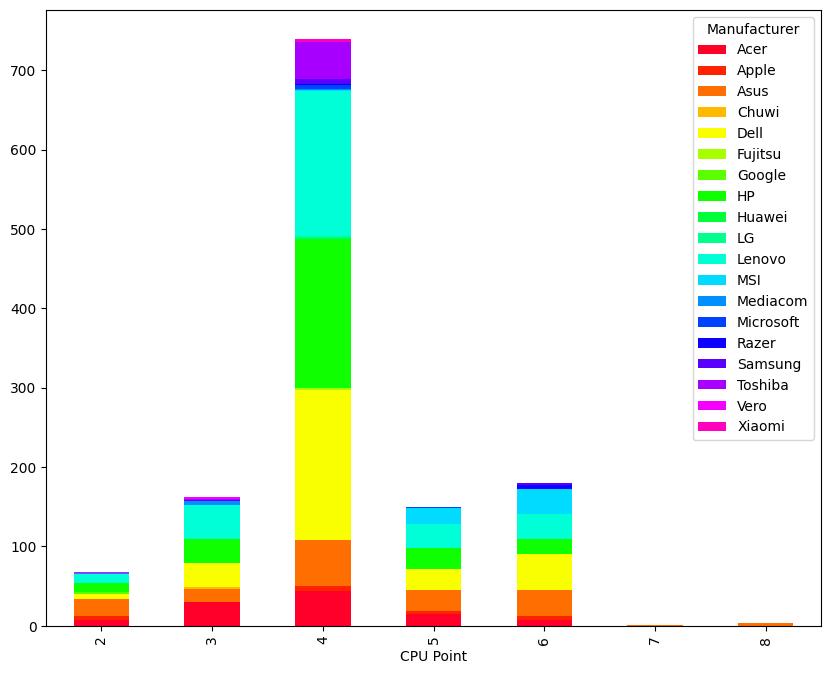

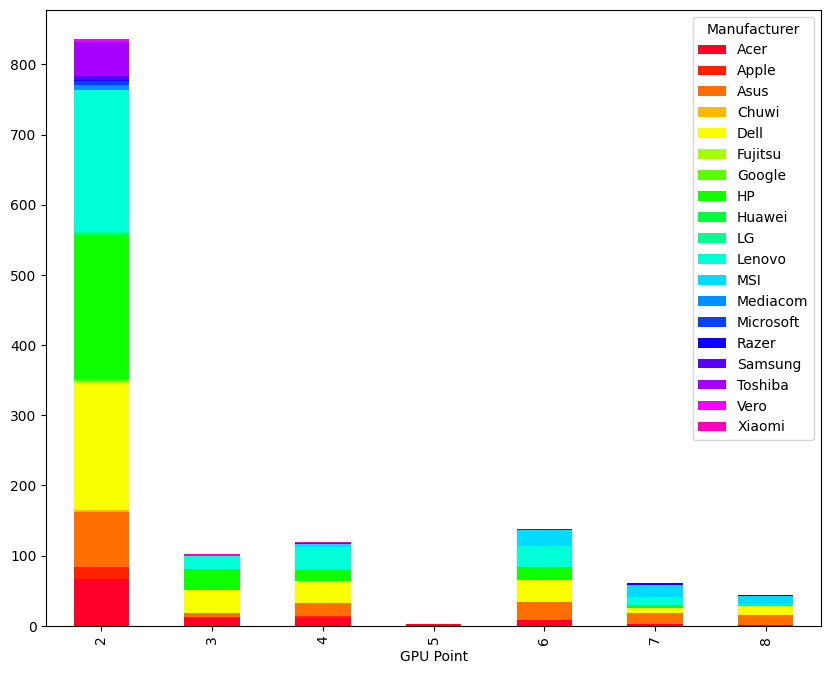

In [ ]:
plt.figure(1)
dataset['Manufacturer'].groupby(dataset['CPU Point']).value_counts().unstack().plot.bar(stacked=True, figsize=(10,8), colormap='gist_rainbow')
print(dataset['Manufacturer'].groupby(dataset['CPU Point']).value_counts())
plt.figure(2)
dataset['Manufacturer'].groupby(dataset['GPU Point']).value_counts().unstack().plot.bar(stacked=True, figsize=(10,8), colormap='gist_rainbow')
print(dataset['Manufacturer'].groupby(dataset['GPU Point']).value_counts())

Text(0.5, 1.0, 'Average CPU and GPU')

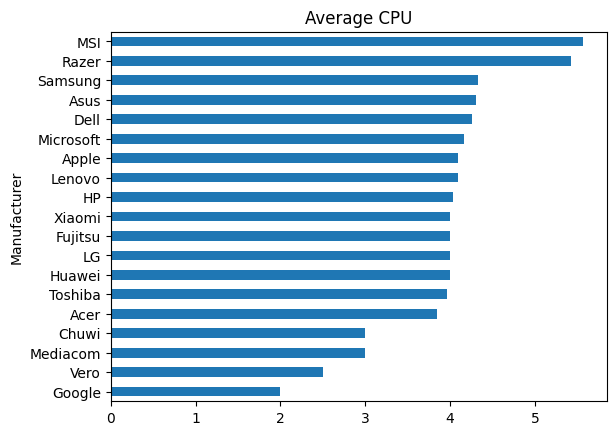

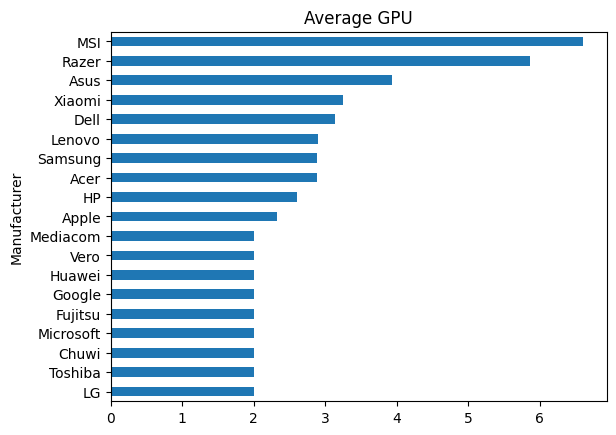

<Figure size 640x480 with 0 Axes>

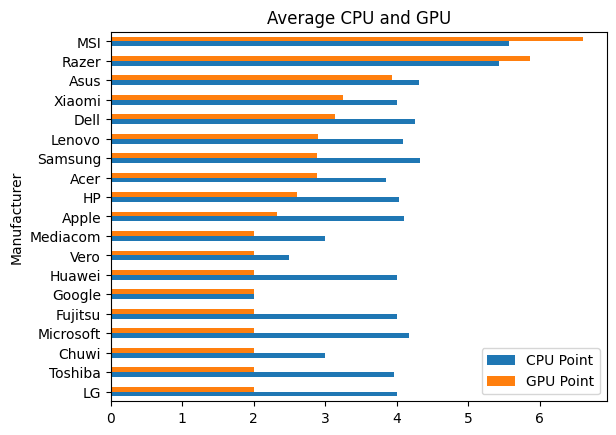

In [ ]:
plt.figure(1)
dataset['CPU Point'].groupby(dataset['Manufacturer']).mean().round(2).sort_values().plot.barh()
plt.title("Average CPU")
plt.figure(2)
dataset['GPU Point'].groupby(dataset['Manufacturer']).mean().round(2).sort_values().plot.barh()
plt.title("Average GPU")
plt.figure(3)
dataset[['CPU Point', 'GPU Point']].groupby(dataset['Manufacturer']).mean().round(2).sort_values('GPU Point').plot.barh()
plt.title("Average CPU and GPU")

The visualizations shows that the ASUS, laptop manufacturer, offers the best CPUs and GPUs. It also shows that MSI provides the highest CPUs and GPUs in terms of their average.

###5. How does CPU Point and GPU Point affect gaming performance (FPS)?

Text(0.5, 1.0, 'Correlation of GPU Point and FPS')

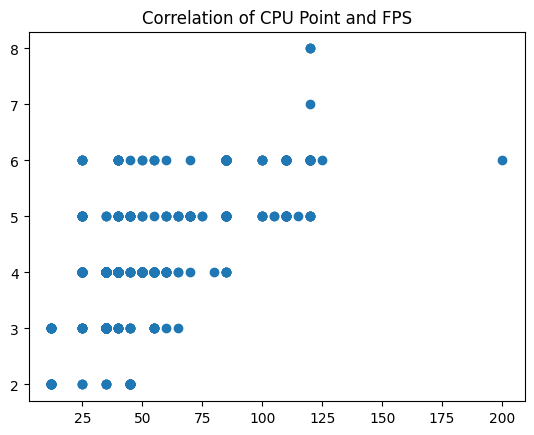

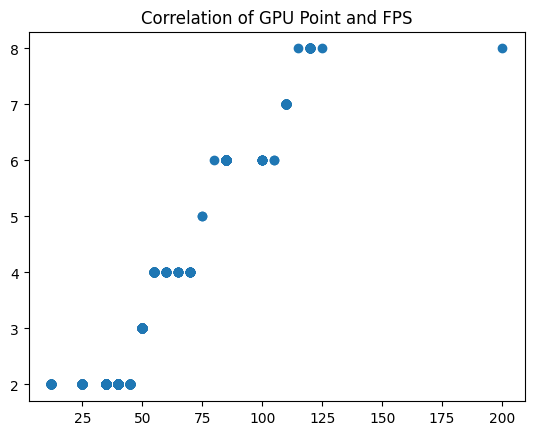

In [ ]:
plt.figure(1)
plt.scatter(dataset['FPS'], dataset['CPU Point'])
plt.title('Correlation of CPU Point and FPS')
plt.figure(2)
plt.scatter(dataset['FPS'], dataset['GPU Point'])
plt.title('Correlation of GPU Point and FPS')

56.35
-139.65 176.4


Text(0.5, 1.0, 'Correlation between GPU Point and CPU Point, and FPS of the laptops')

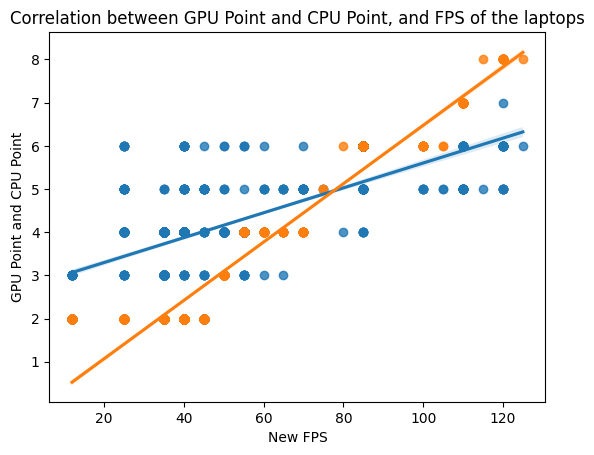

In [ ]:
q1 = np.percentile(list(set((dataset['FPS']).values)), 33)
q2 = np.percentile(list(set((dataset['FPS']).values)), 66)
print(q1)

l_outlier = q1 - 1.5 * q2-q1
u_outlier = q2 + 1.5 * q2-q1
fps_wo_outliers = dataset['FPS'][(dataset['FPS'] >= l_outlier)&(dataset['FPS'] <= u_outlier)]
print(l_outlier, u_outlier)

df = pd.DataFrame({"New FPS":fps_wo_outliers, "CPU Point":dataset['CPU Point'], "GPU Point":dataset['GPU Point']})
sns.regplot(y='CPU Point', x='New FPS', data=df.astype(float))
sns.regplot(y='GPU Point', x='New FPS', data=df.astype(float))
plt.ylabel('GPU Point and CPU Point')
plt.title('Correlation between GPU Point and CPU Point, and FPS of the laptops')

The visualization shows that the higher GPU and CPU point, the higher the FPS of a laptop.

###6. Which of the Manufacturers gives the most low-end, mid-range, high-end laptops via their CPU Point and GPU Point?

Low-end: HP  which offers 232 low-end laptops
Mid-range: Lenovo which offers 57 mid-range laptops
High-end: Asus which offers 48 high-end laptops
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


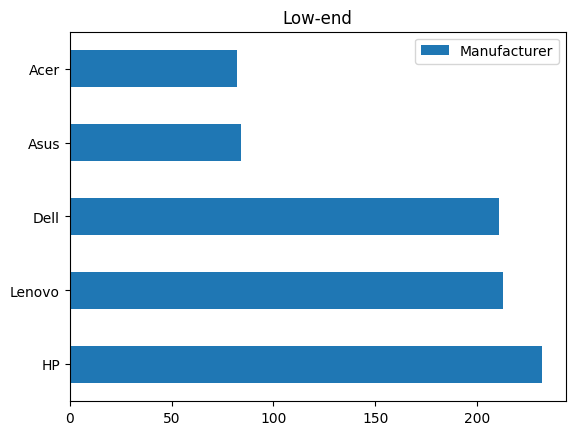

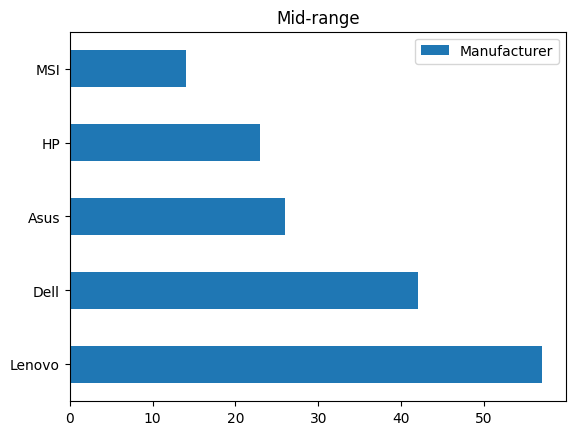

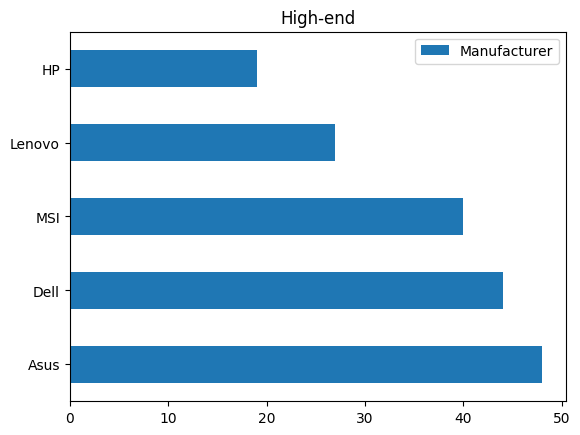

In [ ]:
q1 = np.percentile(list(set((dataset['CPU Point'] + dataset['GPU Point']).values)), 33)
q2 = np.percentile(list(set((dataset['CPU Point'] + dataset['GPU Point']).values)), 66)

print(f"Low-end: {dataset['Manufacturer'][dataset['CPU Point']+dataset['GPU Point'] <= q1].value_counts().idxmax()}  which offers {dataset['Manufacturer'][dataset['CPU Point']+dataset['GPU Point'] <= q1].value_counts().max()} low-end laptops")
print(f"Mid-range: {dataset['Manufacturer'][((dataset['CPU Point']+dataset['GPU Point'] > q1)&(dataset['CPU Point']+dataset['GPU Point'] <= q2))].value_counts().idxmax()} which offers {dataset['Manufacturer'][((dataset['CPU Point']+dataset['GPU Point'] > q1)&(dataset['CPU Point']+dataset['GPU Point'] <= q2))].value_counts().max()} mid-range laptops")
print(f"High-end: {dataset['Manufacturer'][dataset['CPU Point']+dataset['GPU Point'] > q2].value_counts().idxmax()} which offers {dataset['Manufacturer'][dataset['CPU Point']+dataset['GPU Point'] > q2].value_counts().max()} high-end laptops")


print(pd.DataFrame(dataset['Manufacturer'][(dataset['CPU Point'] + dataset['GPU Point']).values <= q1].value_counts()).head(5).plot.barh(title = "Low-end"))
print(pd.DataFrame(dataset['Manufacturer'][((dataset['CPU Point'] + dataset['GPU Point']).values > q1) & ((dataset['CPU Point'] + dataset['GPU Point']).values <= q2)].value_counts()).head(5).plot.barh(title = "Mid-range"))
print(pd.DataFrame(dataset['Manufacturer'][(dataset['CPU Point'] + dataset['GPU Point']).values > q2].value_counts()).head(5).plot.barh(title = "High-end"))

In [ ]:
dataset['Manufacturer'][(dataset['CPU Point'] + dataset['GPU Point']).values <= q1].value_counts().idxmax()

'HP'

The visualization shows that the ASUS manufacturer offers most of the high-end product while HP offers the most low-end product. And that Lenovo offers the most mid-range product.